In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [5]:
df = pd.read_csv('polynomial.csv')
df.head()

,X,y
0,0.020218,1.081908
1,0.071036,0.870276
2,0.087129,1.143862
3,0.118274,0.703221
4,0.143353,0.784947


In [6]:
np.vstack((X, y)).shape

NameError: name 'X' is not defined

In [7]:
X = df.X.values.reshape(-1,1)
y = df.y.values.reshape(-1,1)

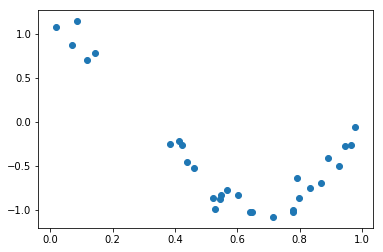

In [8]:
plt.scatter(X, y)

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
import sklearn.metrics as mc

In [17]:
import time
start = time.time()
"""
[Put you code Here]
"""
end = time.time() - start
print(end)

0.0


In [18]:
i = 5
polynomial_features = PolynomialFeatures(degree=i)
linear_regression = LinearRegression()

In [19]:
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
pipeline.fit(X, y)

Pipeline(memory=None,
     steps=[('polynomial_features', PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)), ('linear_regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [20]:
y_pred = pipeline.predict(X)
mc.mean_absolute_error(y, y_pred)

0.08003465049067993

In [21]:
mc.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

In [22]:
# Evaluate the models using crossvalidation
scores = -1 * cross_val_score(pipeline, X, y,
                         scoring="neg_mean_absolute_error", cv=5)

In [23]:
scores.mean()

3.7285933442931514

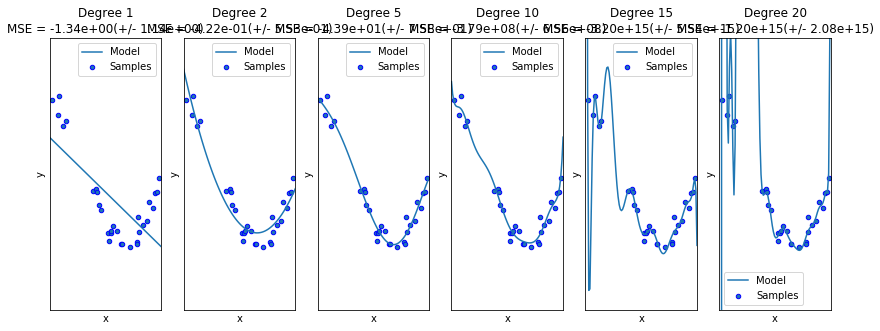

In [25]:

# degrees = list(range(1,20,2))
degrees = [1, 2, 5, 10, 15, 20]

scores_list = []
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i])
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X, y)

    # Evaluate the models using crossvalidation
    scores = -1*cross_val_score(pipeline, X, y,
                             scoring="neg_mean_squared_error", cv=4)
    scores_list.append(scores.mean())
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test.reshape(-1,1)), label="Model")
    #plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

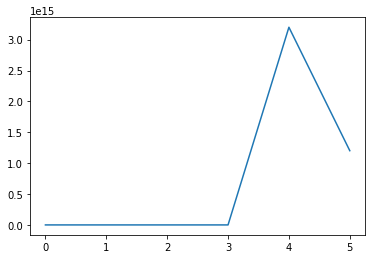

In [26]:
plt.plot(scores_list)

In [87]:
degrees[np.argmin(scores_list)]

2